In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [2]:
train_dir = 'CATS_DOGS/train/'
test_dir = 'CATS_DOGS/test/'

In [3]:
train_gen = ImageDataGenerator(rescale=1/255,
                              rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=False,
                              fill_mode='reflect')

test_gen = ImageDataGenerator(rescale=1/255)

In [19]:
train_data = train_gen.flow_from_directory(directory=train_dir,
                                           target_size=(150,150),
                                           batch_size=32,
                                           class_mode='binary')

test_data = test_gen.flow_from_directory(directory=test_dir,
                                        target_size=(150,150),
                                        batch_size=32,
                                        class_mode='binary',
                                        shuffle=False)

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping

In [8]:
model = Sequential()

model.add(Conv2D(filters=32, padding='same', kernel_size=(3,3), input_shape = (150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, padding='same', kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, padding='same', kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,529 (494.25 KB)

 Trainable params: 126,529 (494.25 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights=True,
    min_delta=0.001,
)


model.fit(train_data,
         epochs=30,
         validation_data=test_data,
         callbacks=[early_stop])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
530/586 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step - accuracy: 0.5207 - loss: 0.6889

/opt/anaconda3/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:864: UserWarning: Truncated File Read
  warnings.warn(str(msg))


586/586 ━━━━━━━━━━━━━━━━━━━━ 165s 281ms/step - accuracy: 0.5238 - loss: 0.6879 - val_accuracy: 0.5837 - val_loss: 0.6516
Epoch 2/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 176s 300ms/step - accuracy: 0.6041 - loss: 0.6540 - val_accuracy: 0.6353 - val_loss: 0.6387
Epoch 3/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 181s 309ms/step - accuracy: 0.6506 - loss: 0.6264 - val_accuracy: 0.6890 - val_loss: 0.5992
Epoch 4/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 185s 315ms/step - accuracy: 0.6755 - loss: 0.6009 - val_accuracy: 0.6980 - val_loss: 0.5803
Epoch 5/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 186s 318ms/step - accuracy: 0.7050 - loss: 0.5771 - val_accuracy: 0.7282 - val_loss: 0.5341
Epoch 6/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 190s 324ms/step - accuracy: 0.7109 - loss: 0.5616 - val_accuracy: 0.6920 - val_loss: 0.5817
Epoch 7/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 193s 329ms/step - accuracy: 0.7223 - loss: 0.5502 - val_accuracy: 0.7327 - val_loss: 0.5312
Epoch 8/30
586/586 ━━━━━━━━━━━━━━━━━━━━ 192s 328ms/step - accuracy: 0.7291 - loss: 0.53

In [12]:
model.history.history['accuracy']

[0.554713785648346,
 0.6065731048583984,
 0.6597663164138794,
 0.6804140210151672,
 0.7017553448677063,
 0.7105585932731628,
 0.7221362590789795,
 0.7361681461334229,
 0.7453982830047607,
 0.7574561238288879,
 0.769727349281311,
 0.7795443534851074,
 0.7976311445236206,
 0.8037667274475098,
 0.815824568271637,
 0.8175318837165833,
 0.8233473896980286,
 0.8347116112709045,
 0.8406338095664978,
 0.8435682654380798,
 0.8523182272911072,
 0.8554660677909851,
 0.8579736351966858,
 0.8661900162696838,
 0.8707250952720642,
 0.8707784414291382,
 0.8763271570205688,
 0.8797417879104614,
 0.8834231495857239,
 0.8840100169181824]

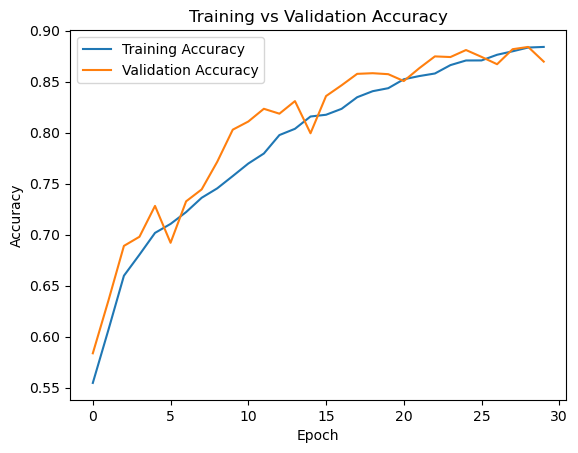

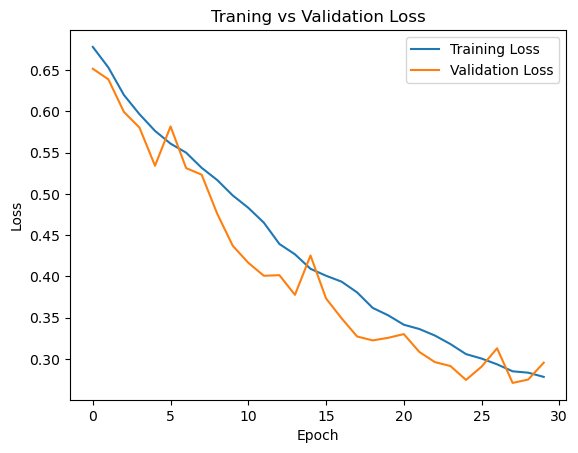

In [13]:
import matplotlib.pyplot as plt 

plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Traning vs Validation Loss')
plt.show()

In [14]:
model.evaluate(test_data)

196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.8803 - loss: 0.2800


[0.2709871232509613, 0.88177889585495]

In [15]:
model.save('cat_vs_dog.h5')

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Test veri setinden gerçek etiketleri ve tahminleri alalım
test_data.reset()  # sıfırlamazsan shuffle etkiler
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int).reshape(-1)

# Confusion Matrix
print(confusion_matrix(y_true, y_pred))

# Classification Report
print(classification_report(y_true, y_pred, target_names=['Kedi', 'Köpek']))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step
[[2891  235]
 [ 504 2621]]
              precision    recall  f1-score   support

        Kedi       0.85      0.92      0.89      3126
       Köpek       0.92      0.84      0.88      3125

    accuracy                           0.88      6251
   macro avg       0.88      0.88      0.88      6251
weighted avg       0.88      0.88      0.88      6251



In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np

 # resim yolun
for i in range(1,7):
    img_path = f"predictions/{i}.jpeg"
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    
    if prediction > 0.5:
        print("Köpek (% {:.2f} olasılıkla)".format(prediction))
    else:
        print("Kedi (% {:.2f} olasılıkla)".format(1 - prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Köpek (% 0.89 olasılıkla)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Köpek (% 0.63 olasılıkla)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Köpek (% 0.87 olasılıkla)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Kedi (% 0.98 olasılıkla)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Kedi (% 0.99 olasılıkla)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Kedi (% 0.97 olasılıkla)


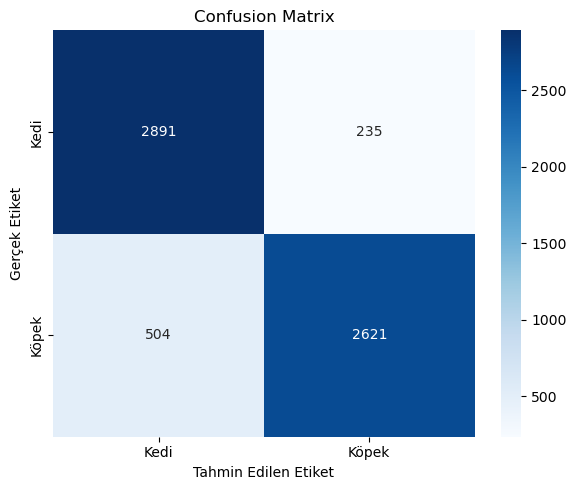

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix değerlerini manuel giriyoruz
cm = confusion_matrix(y_true, y_pred)

labels = ['Kedi', 'Köpek']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
